In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from FFNN import FFNN
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate random dataset
num_samples = 10000
num_features = 10
num_classes = 2

X = np.random.randn(num_samples, num_features)
y = np.random.randint(0, num_classes, size=(num_samples,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

encoder = OneHotEncoder(sparse_output=False) 
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

In [4]:
output_size = y_train_encoded.shape[1]
layers = [X_train.shape[1], 4, 4, output_size]
activations = ['relu', 'relu', 'sigmoid']
loss = 'binary_cross_entropy'

model = FFNN(layers, activations, loss, init_method="uniform", lower=-0.5, upper=0.5, seed=42)
history = model.train(X_train, y_train_encoded, epochs=1000, lr=0.1, batch_size=32)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Epoch 100/1000, Loss: 0.6896428347765868
Epoch 200/1000, Loss: 0.689206915263344
Epoch 300/1000, Loss: 0.6884024991550391
Epoch 400/1000, Loss: 0.6877915845110528
Epoch 500/1000, Loss: 0.687590494294777
Epoch 600/1000, Loss: 0.6873681522918225
Epoch 700/1000, Loss: 0.6873290237803273
Epoch 800/1000, Loss: 0.6868474768368417
Epoch 900/1000, Loss: 0.68642041636322
Epoch 1000/1000, Loss: 0.6863835322553163
Accuracy: 0.5075


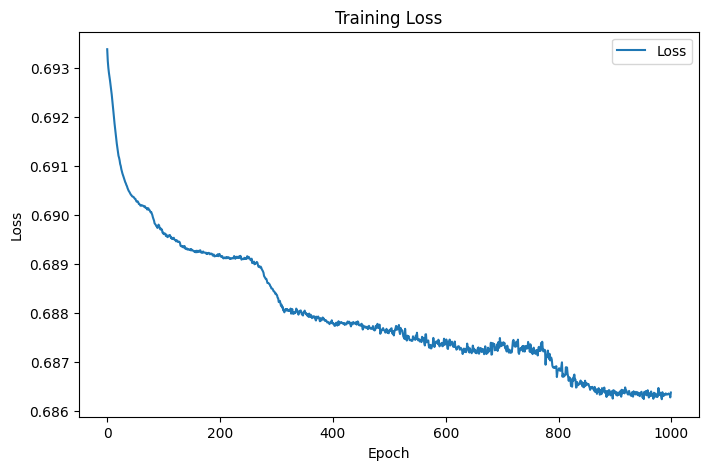

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.show()

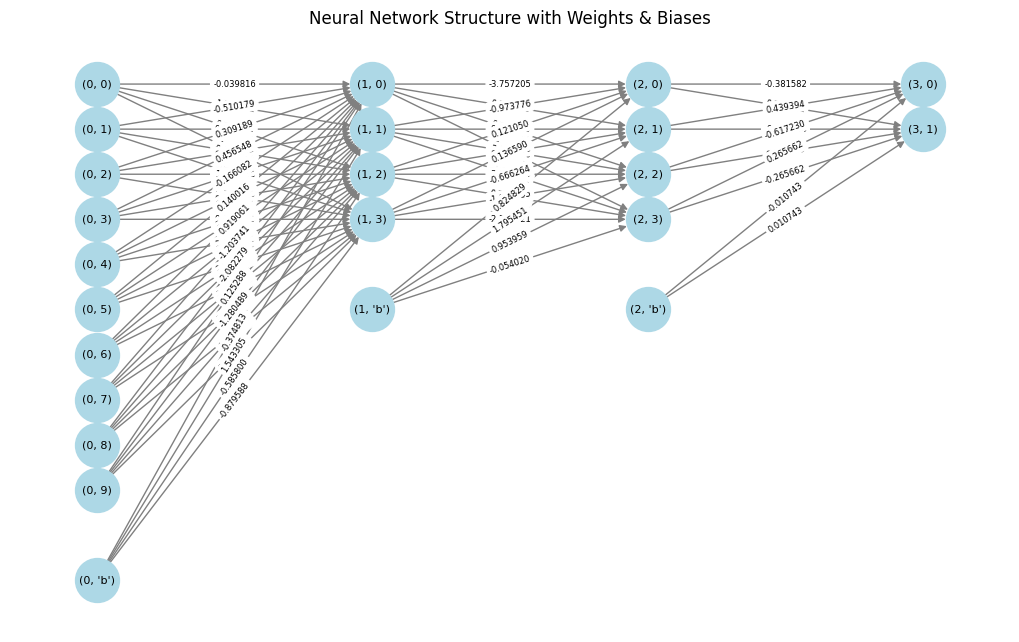

In [6]:
model.visualize_network()

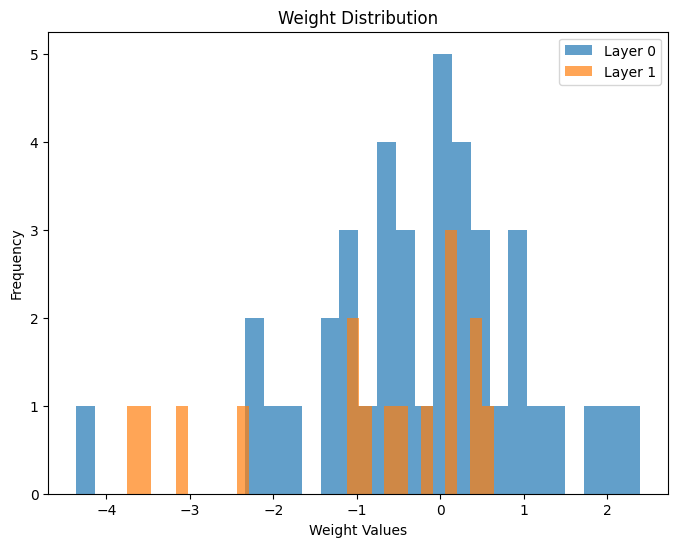

In [7]:
model.plot_weight_distribution([0, 1])

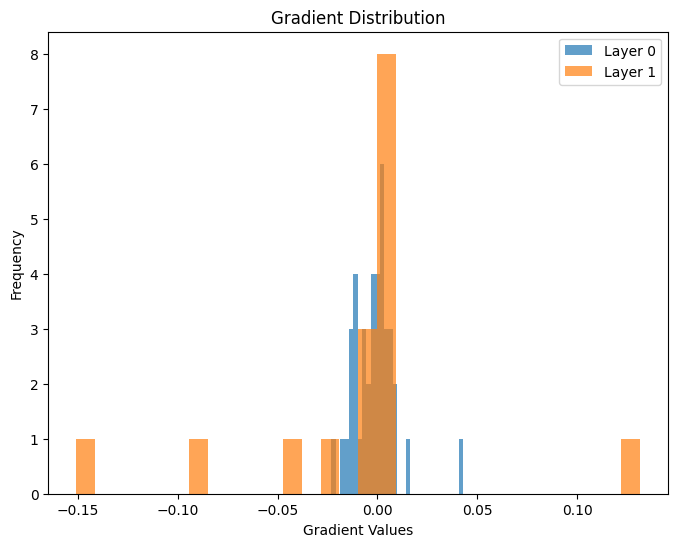

In [8]:
model.plot_gradient_distribution([0, 1])